In [22]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [23]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [24]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

In [25]:
data = yf.Ticker("TSLA")
print(data)

yfinance.Ticker object <TSLA>


In [26]:
tesla_data = data.history(period = "max")
print(tesla_data)

                                 Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2026-01-20 00:00:00-05:00  429.359985  430.730011  417.440002  419.250000   
2026-01-21 00:00:00-05:00  421.660004  438.200012  419.619995  431.440002   
2026-01-22 00:00:00-05:00  435.160004  449.500000  432.630005  449.359985   
2026-01-23 00:00:00-05:00  447.429993  452.429993  444.040009  449.059998   
2026-01-26 00:00:00-05:00  445.000000  445.040009  434.279999  435.200012   

In [27]:
tesla_data.reset_index(inplace = True)

In [28]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
blank = requests.get(url)
html_data = blank.content

In [29]:
soup = BeautifulSoup(html_data, 'html.parser')

In [30]:
tesla_revenue = pd.DataFrame(columns =['Data', 'Revenue'])
print(tesla_revenue)
table = soup.find_all("tbody")[1]

for row in table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) != 2:
        continue
        
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    
    tesla_revenue = pd.concat(
        [tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
        ignore_index=True
    )
print(tesla_revenue)

Empty DataFrame
Columns: [Data, Revenue]
Index: []
   Data  Revenue        Date
0   NaN  $21,454  2022-09-30
1   NaN  $16,934  2022-06-30
2   NaN  $18,756  2022-03-31
3   NaN  $17,719  2021-12-31
4   NaN  $13,757  2021-09-30
5   NaN  $11,958  2021-06-30
6   NaN  $10,389  2021-03-31
7   NaN  $10,744  2020-12-31
8   NaN   $8,771  2020-09-30
9   NaN   $6,036  2020-06-30
10  NaN   $5,985  2020-03-31
11  NaN   $7,384  2019-12-31
12  NaN   $6,303  2019-09-30
13  NaN   $6,350  2019-06-30
14  NaN   $4,541  2019-03-31
15  NaN   $7,226  2018-12-31
16  NaN   $6,824  2018-09-30
17  NaN   $4,002  2018-06-30
18  NaN   $3,409  2018-03-31
19  NaN   $3,288  2017-12-31
20  NaN   $2,985  2017-09-30
21  NaN   $2,790  2017-06-30
22  NaN   $2,696  2017-03-31
23  NaN   $2,285  2016-12-31
24  NaN   $2,298  2016-09-30
25  NaN   $1,270  2016-06-30
26  NaN   $1,147  2016-03-31
27  NaN   $1,214  2015-12-31
28  NaN     $937  2015-09-30
29  NaN     $955  2015-06-30
30  NaN     $940  2015-03-31
31  NaN     $957  201

In [31]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)
print(tesla_revenue)

   Data Revenue        Date
0   NaN   21454  2022-09-30
1   NaN   16934  2022-06-30
2   NaN   18756  2022-03-31
3   NaN   17719  2021-12-31
4   NaN   13757  2021-09-30
5   NaN   11958  2021-06-30
6   NaN   10389  2021-03-31
7   NaN   10744  2020-12-31
8   NaN    8771  2020-09-30
9   NaN    6036  2020-06-30
10  NaN    5985  2020-03-31
11  NaN    7384  2019-12-31
12  NaN    6303  2019-09-30
13  NaN    6350  2019-06-30
14  NaN    4541  2019-03-31
15  NaN    7226  2018-12-31
16  NaN    6824  2018-09-30
17  NaN    4002  2018-06-30
18  NaN    3409  2018-03-31
19  NaN    3288  2017-12-31
20  NaN    2985  2017-09-30
21  NaN    2790  2017-06-30
22  NaN    2696  2017-03-31
23  NaN    2285  2016-12-31
24  NaN    2298  2016-09-30
25  NaN    1270  2016-06-30
26  NaN    1147  2016-03-31
27  NaN    1214  2015-12-31
28  NaN     937  2015-09-30
29  NaN     955  2015-06-30
30  NaN     940  2015-03-31
31  NaN     957  2014-12-31
32  NaN     852  2014-09-30
33  NaN     769  2014-06-30
34  NaN     621  201

In [32]:
print(tesla_revenue)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
print(tesla_revenue)

   Data Revenue        Date
0   NaN   21454  2022-09-30
1   NaN   16934  2022-06-30
2   NaN   18756  2022-03-31
3   NaN   17719  2021-12-31
4   NaN   13757  2021-09-30
5   NaN   11958  2021-06-30
6   NaN   10389  2021-03-31
7   NaN   10744  2020-12-31
8   NaN    8771  2020-09-30
9   NaN    6036  2020-06-30
10  NaN    5985  2020-03-31
11  NaN    7384  2019-12-31
12  NaN    6303  2019-09-30
13  NaN    6350  2019-06-30
14  NaN    4541  2019-03-31
15  NaN    7226  2018-12-31
16  NaN    6824  2018-09-30
17  NaN    4002  2018-06-30
18  NaN    3409  2018-03-31
19  NaN    3288  2017-12-31
20  NaN    2985  2017-09-30
21  NaN    2790  2017-06-30
22  NaN    2696  2017-03-31
23  NaN    2285  2016-12-31
24  NaN    2298  2016-09-30
25  NaN    1270  2016-06-30
26  NaN    1147  2016-03-31
27  NaN    1214  2015-12-31
28  NaN     937  2015-09-30
29  NaN     955  2015-06-30
30  NaN     940  2015-03-31
31  NaN     957  2014-12-31
32  NaN     852  2014-09-30
33  NaN     769  2014-06-30
34  NaN     621  201

In [33]:
print(tesla_revenue.tail(5))

   Data Revenue        Date
48  NaN      31  2010-09-30
49  NaN      28  2010-06-30
50  NaN      21  2010-03-31
52  NaN      46  2009-09-30
53  NaN      27  2009-06-30


In [48]:
data2 = yf.Ticker("GME")
print(data2)

yfinance.Ticker object <GME>


In [49]:
gme_data = data2.history(period = "max")

In [50]:
gme_data.reset_index(inplace = True)
print(gme_data.head(5))

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [53]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data2 = requests.get(url).content

In [54]:
soup2 = BeautifulSoup(html_data2, "html.parser")

In [59]:
gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])
table = soup2.find_all("tbody")[1]

for row in table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) != 2:
        continue
        
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    
    gme_revenue = pd.concat(
        [tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
        ignore_index=True
    )
print(gme_revenue)

    Data Revenue        Date
0    NaN   21454  2022-09-30
1    NaN   16934  2022-06-30
2    NaN   18756  2022-03-31
3    NaN   17719  2021-12-31
4    NaN   13757  2021-09-30
..   ...     ...         ...
155  NaN      28  2010-06-30
156  NaN      21  2010-03-31
157  NaN      46  2009-09-30
158  NaN      27  2009-06-30
159  NaN    $709  2005-01-31

[160 rows x 3 columns]


tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

In [60]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"",regex=True)

In [61]:
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [62]:
print(gme_revenue.tail(5))

    Data Revenue        Date
155  NaN      28  2010-06-30
156  NaN      21  2010-03-31
157  NaN      46  2009-09-30
158  NaN      27  2009-06-30
159  NaN     709  2005-01-31


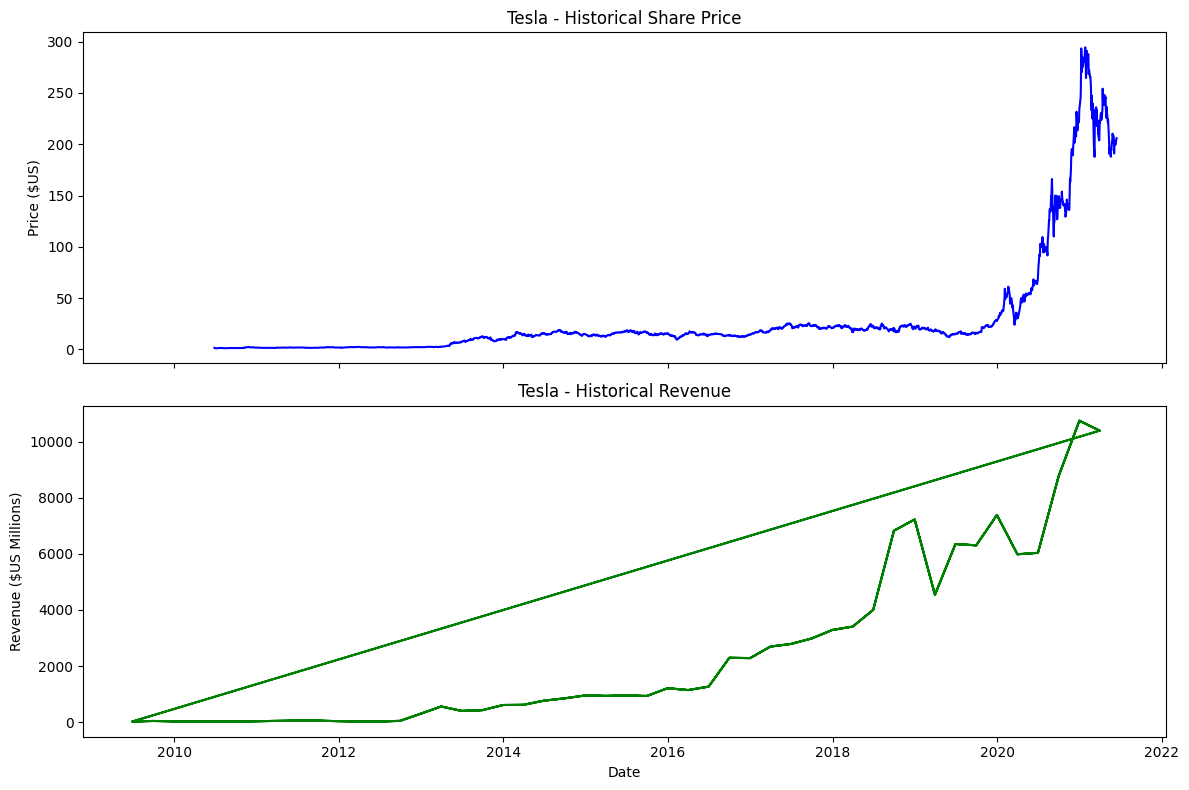

In [63]:
make_graph(tesla_data, tesla_revenue, "Tesla")

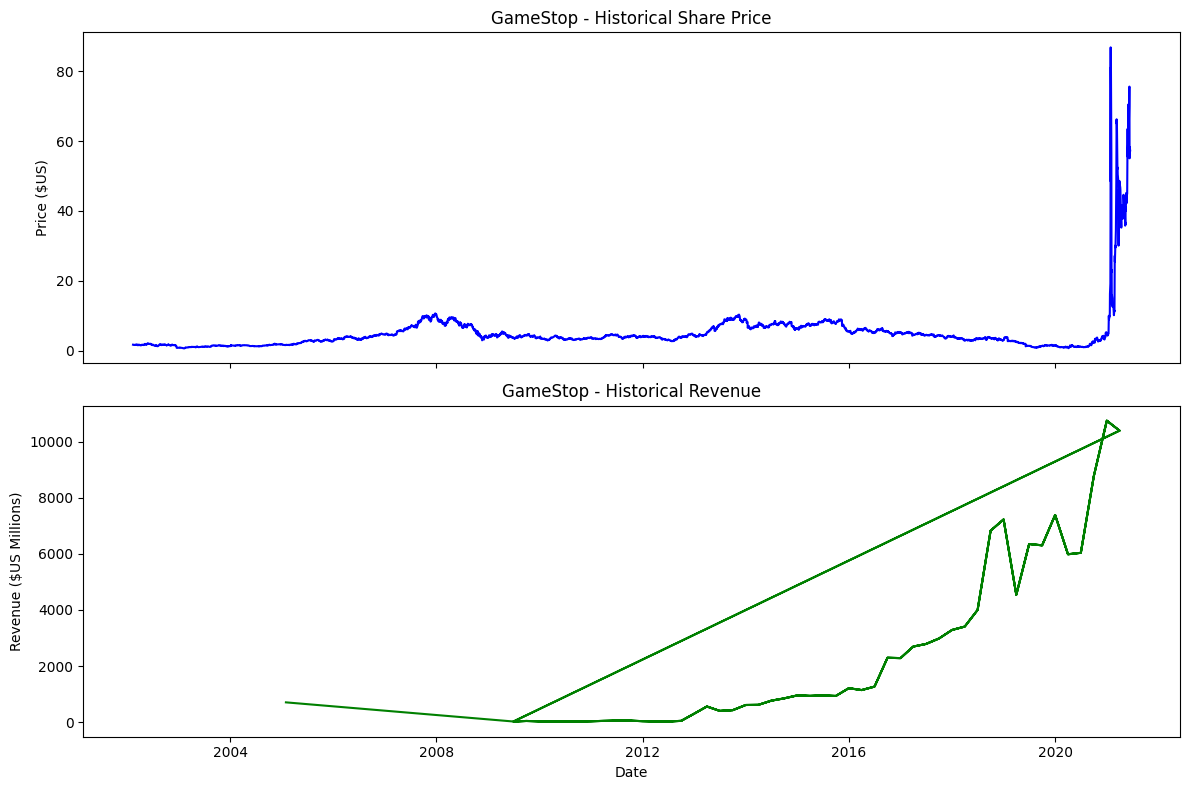

In [64]:
make_graph(gme_data, gme_revenue, "GameStop")